# **DIP HW1**

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from google.colab.patches import cv2_imshow
from google.colab import files

**Q1-Part1**

In [3]:
uploaded = files.upload()
uploaded = files.upload()
uploaded = files.upload()

Saving img1.jpg to img1 (1).jpg


Saving img2.jpg to img2.jpg


Saving img3.jpg to img3.jpg


without opencv

In [4]:
def calc_hist(image):
  '''
  calculate image histogram
  don't use libraries
  input(s):
    image (ndarray): input image
  output(s):
    hist (ndarray): computed input image histogram
  '''
  hist = np.zeros(256,dtype=int)

  ############
  # Your code
  # Start
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        hist[image[i,j]] += 1

  # End
  return hist


 with opencv

In [5]:
############
# Your code
# Start
cv_hist =  cv2.calcHist([cv2.imread('img1.jpg',cv2.IMREAD_GRAYSCALE)],[0],None,[256],[0,256])
# End

don't change next cell

Text(0.5, 1.0, 'Opencv histogram')

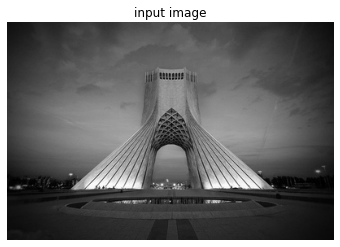

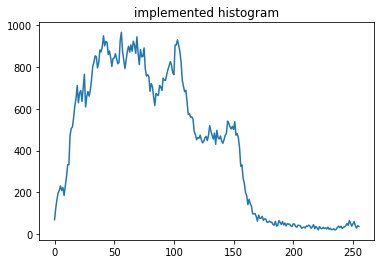

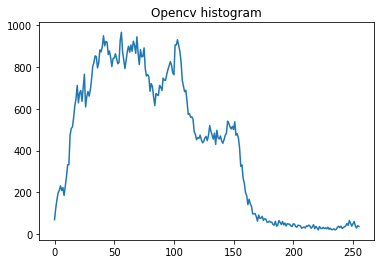

In [6]:
img = cv2.imread('img1.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap='gray',vmin=0,vmax=255)
plt.title('input image')
plt.axis('off')
plt.figure()
plt.plot(calc_hist(img))
plt.title('implemented histogram')
plt.figure()
plt.plot(cv_hist)
plt.title('Opencv histogram')

**Q3-Part2**

In [7]:
def stretch_hist(image):
  '''
  don't use libraries
  input(s):
    image (ndarray): input image
  output(s):
    output_image (ndarray): enhanced image with histogram stretching
  '''
  output_image = image.copy()
  ############
  # Your code
  # Start

  output_image = (((output_image - np.min(output_image))/(np.max(output_image) - np.min(output_image)))*255).astype(np.uint8)
  # End
  return output_image
  
  

don't change next cell

Text(0.5, 1.0, 'implemented histogram')

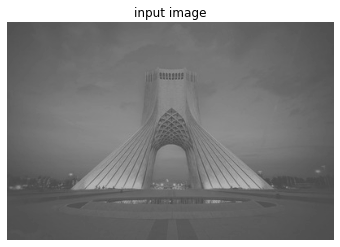

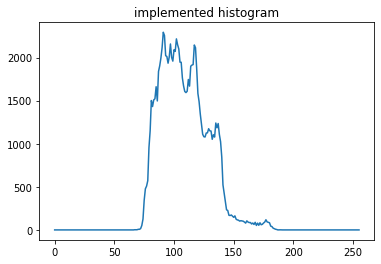

In [8]:
img2 = cv2.imread('img2.jpg',cv2.IMREAD_GRAYSCALE)
enhanced_image = stretch_hist(img2)
plt.imshow(img2,cmap='gray',vmin=0,vmax=255)
plt.title('input image')
plt.axis('off')
plt.figure()
plt.plot(calc_hist(img2))
plt.title('implemented histogram')

don't change next cell

Text(0.5, 1.0, 'implemented histogram')

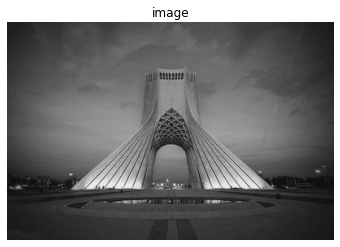

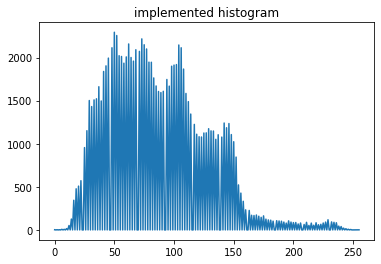

In [9]:
plt.imshow(enhanced_image,cmap='gray',vmin=0,vmax=255)
plt.title('image')
plt.axis('off')
plt.figure()
plt.plot(calc_hist(enhanced_image))
plt.title('implemented histogram')


**Q3-Part3**

In [10]:
def modified_stretch_hist(image):
  '''
  don't use libraries
  input(s):
    image (ndarray): input image
  output(s):
    output_image (ndarray): enhanced image with modified histogram stretching
  '''
  output_image = image.copy()
  ############
  # Your code
  # Start
  h,w = output_image.shape
  all = h * w

  all_data = output_image.reshape(-1)
  xs = np.argsort(all_data)
  clip_rate = 0.0005
  clip_items = int(clip_rate * all)

  for i in range(clip_items):
    
    all_data[xs[i]] = all_data[xs[clip_items]]
    all_data[xs[-(i+1)]] = all_data[xs[-(clip_items+1)]]
  

  output_image = stretch_hist(all_data.reshape(h,w))

  # End
  ############
  return output_image
  

Text(0.5, 1.0, 'enhanced histogram')

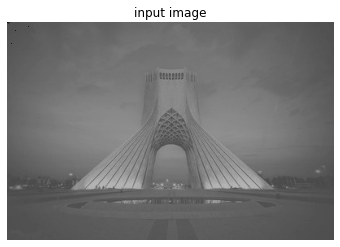

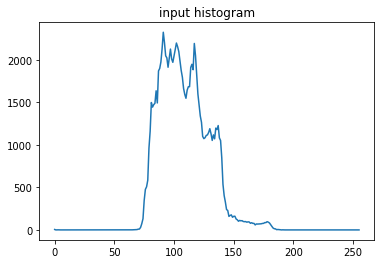

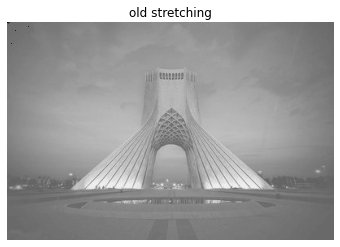

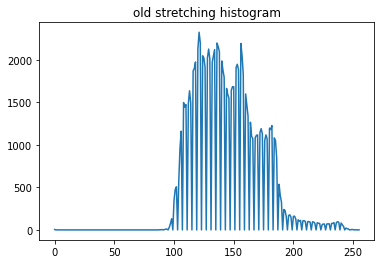

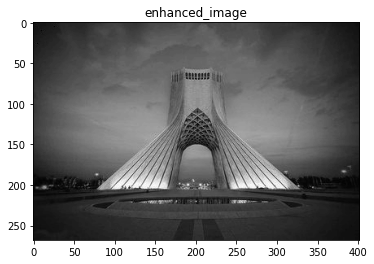

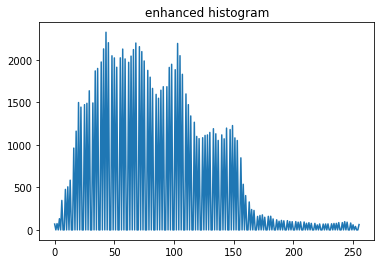

In [11]:
img3 = cv2.imread('img3.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(img3,cmap='gray',vmin=0,vmax=255)
plt.title('input image')
plt.axis('off')
plt.figure()
plt.plot(calc_hist(img3))
plt.title('input histogram')
plt.figure()
plt.imshow(stretch_hist(img3),cmap='gray',vmin=0,vmax=255)
plt.title('old stretching')
plt.axis('off')
plt.figure()
plt.plot(calc_hist(stretch_hist(img3)))
plt.title('old stretching histogram')
plt.figure()
enhanced_image = modified_stretch_hist(img3)
plt.imshow(enhanced_image,cmap='gray',vmin=0,vmax=255)
plt.title('enhanced_image')
plt.figure()
plt.plot(calc_hist(enhanced_image))
plt.title('enhanced histogram')